# Time Series Analysis and the Fourier Transform

By Tawyeeb Soetan

Nuffield Future Researchers Program 2020

## Contents
1. Introduction
    * 1.1 - General Trend
    * 1.2 - Seasonality
    * 1.3 - Autocorrelation
2. Fourier Transform
    * 2.1 - How does it work?
    * 2.2 - Why is it useful?
3. Use case: Time Series Classification
    * 3.1 - What is Classification?
    * 3.2 - Problem statement: time series classification
    * 3.3 - Data Set: FordA
    * 3.4 - Methodology
    * 3.5 - Results
4. Future work
5. References


## Package Imports

Before we start we need to import these packages.

In [1]:
import numpy as np
from numpy import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from utils import load_data
from utils import powerspectrum
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

## 1. Introduction
A time series is a observations of data collected repeatively over time, which is often plotted onto a line graph. Here we generate a random time series to illustrate the different aspects of time series analysis. In this example, we consider observations taken made at equal intervals:

In [2]:
vol = .030
lag = 300
df = pd.DataFrame(np.random.randn(100000) * sqrt(vol) * sqrt(1 / 252.)).cumsum()

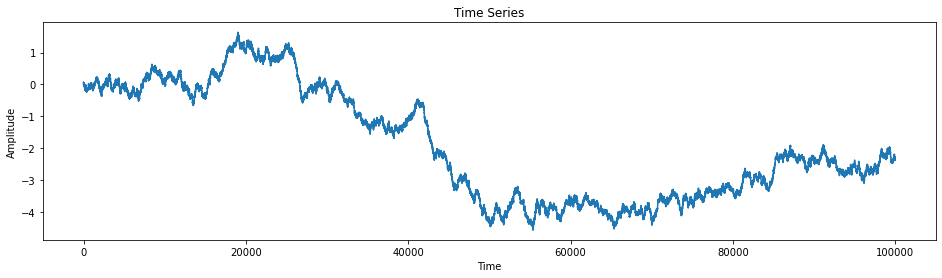

In [29]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
plt.plot(df[0].tolist())
ax.set(xlabel ="Time", ylabel="Amplitude", title="Time Series");

This is an example on a single univariate time series. An important aspect of time series is the statistical dependence of values. This refers to the fact that all future values of a time series depend on previous values. So, eventhough time series data can be used to make estimates of values within the time period of the observations, time series data is most useful when used to extrapolate and predict future values. From the above graph, there are various aspects to be indentified that can tell us certain characteristics about the data, such as:

* Its General Trend
* Its Seasonality
* The autocorrelation between observations

### 1.1 - General Trend
The general trend of a time series refers to the overall change that occurs in the data within the observed time period. For instance, the overall decrease in the manufactute sales volume of icecream in the UK between 2009 and 2018. The general trend of the data usually does not take into account fluctuations between the set time period. 

<img src="images/Ice Cream Sales.png" width="600">

To visualise the general trend of the data, a trend line (which models the data as a polynormial) can be drawn to by calculating the moving average of each cycle and drawing the best fit line for each point. This trend line could also be used to make estimates and predictions, however this approach is quite ignorant as it suggests that the next observation is the mean of the past observations.

There are other options for modelling the data such as [exponential smoothing](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/) , which gives a decreasing weight to data that was collected further from the present, or Seasonal Autoregressive integraded moving averag model ([SARIMA](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)) , which combines a collection of simple models to create a more complex model that better represents the data.

### 1.2 - Seasonality
Seasonality refers to the seasonal fluctuations in the data. For example, a large increase of ice-cream sales within the summer months and a large dip in sales during winter. 

<img src="images/Texas Employment.png" width="600">


You can measure the seasonality by calculating the seasonal effect of the data using:

**Seasonal Effect = Real Value - Value from Trend Line**

By calculating the average seasonal effect for each point/season in each cycle, you can make predictions for the future values using extrapolations. However, there are clear limitations to doing so, such as how random events or other variables could alter the seasonality of the time series. An example of this could be that after a gradual increase of global tempertures there were also increases to the sales of ice-cream during early autumn or late spring. If variables, such as these, are not taken into account, then these predictions become less accurate the further into the future these prediction are made.
 
### 1.3 - Autocorrelation

Autocorrelation refers to how similar observation are between a fixed lag time. 

<img src="images/autocorrelation.png" width="600">


The above graph displays the correlation (y-axis) between a given point in time and previous observation at a given lag (x-axis). The correlation of variable essential details the direction that two variable move in relation to one another, i.e. a positive correlation shows that as one variable increase, the other also increase whilst a negative correlation shows that as one variable increases, the other decrease. 

From this example, it is apparent that there is high positive correlation between the current observation and the observation 24 lags in time. There is also high negative correlation between the observation 12 lags and 36 lags respectively. This suggest that there is correlation between observations every 24 time periods, possibly hinting towards seasonal fluctuations in the data.

Additionally, the fact that correlation between current and previous observations can be found, further emphasises the statisical dependence of values in time series data, showing that previous values do have an effect on future values. 

## 2. Fourier transform
The Fourier transform is used to tranform a function of time into a function of frequency. This is denoted in the equation:

$$\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^{-2\pi ix\xi} dx,$$
for any real number $\xi$.


where $x$ represents *time*, the transform variable $\xi$ represents *frequency*. $f$ can determined $\hat{f}$ by using the inverse transform:

$$f(x) = \int_{-\infty}^{\infty} \hat{f}(\xi) e^{2\pi ix\xi} dx,$$
for any real number $x$.

Despite changing the type of information being held, each function $f$ and $\hat{f}$ represent the same data. Such as how both the IP address and URL can represent the same web page.


### 2.1 - How does it work?
Any continuous signal in the time domain can be represented as the sum of simple sine curves. Since these can be described using only their amplitude, frequency and phase, you can plot the frequency domain representation of the signal by plotting changes in amplitude and phase at given frequencies.

Take this sine wave as an example.
Original: y = sin(15x) and y = sin(7x)

In [4]:
x = np.linspace(0,np.pi, 400)
y1 = np.sin(15*x)
y2 = np.sin(7*x)

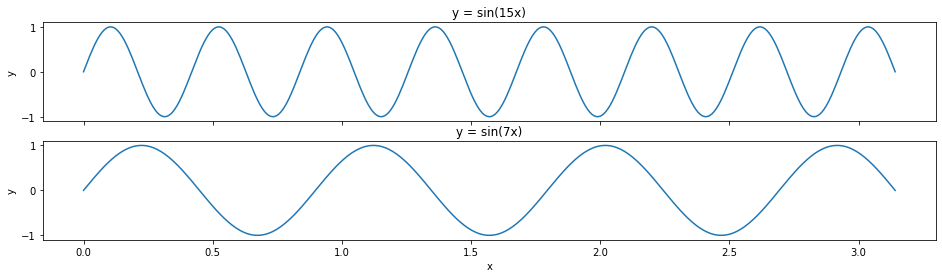

In [5]:
fig, axs = plt.subplots(2, figsize=plt.figaspect(0.25))
axs[0].plot(x,y1)
axs[0].set_title("y = sin(15x)")
axs[1].plot(x,y2)
axs[1].set_title("y = sin(7x)")
for ax in axs.flat:
    ax.set(xlabel = "x", ylabel="y")
    ax.label_outer()

Fourier Transformed Sine Curves:

In [6]:
sp1 = powerspectrum(y1)
sp2 = powerspectrum(y2)
freq = np.fft.fftfreq(x.shape[-1])

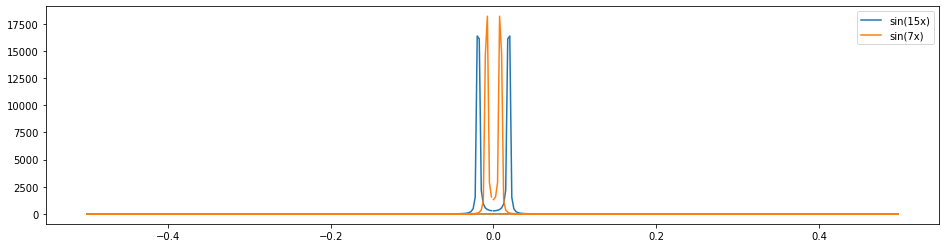

In [7]:
fig, axs = plt.subplots(1, figsize=plt.figaspect(0.25))
axs.plot(freq, sp1, label="sin(15x)")
axs.plot(freq, sp2, label="sin(7x)")
plt.legend();

When we performed the fourier transform on this wave, we see a "spikes" form at certain frequencies. These frequencies correspond to the frequency of the original sine wave that was tranformed. You could also revert it back using the inverse function.

Additionally, when we superimpose(add) multiple of these waveforms, the waves can interfere constructively(add onto each other) or destructively(subtract from each other) at certain points. This alters the shape of these waves. Interestingly, when we then apply the fourier transform to these composite waves, the frequencies of their constituent waveforms still form the same peaks in the new function.

New: y = sin(15x) + sin(7x)

In [8]:
a = np.linspace(0,np.pi, 400)
b = np.sin(15*x)+np.sin(7*x)

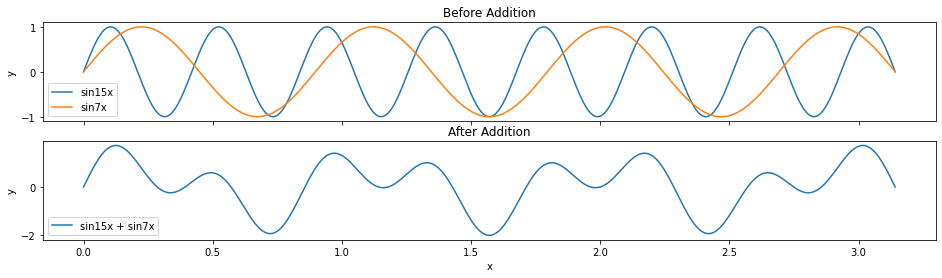

In [9]:
fig, axs = plt.subplots(2, figsize=plt.figaspect(0.25))
axs[0].plot(x,y1,label="sin15x")
axs[0].plot(x,y2,label="sin7x")
axs[0].set_title("Before Addition")
axs[1].plot(a,b,label="sin15x + sin7x")
axs[1].set_title("After Addition")
for ax in axs.flat:
    ax.set(xlabel="x",ylabel="y")
    ax.label_outer()
axs[0].legend()
axs[1].legend();

In [10]:
impure_sp = powerspectrum(b)
impure_freq = np.fft.fftfreq(x.shape[-1])

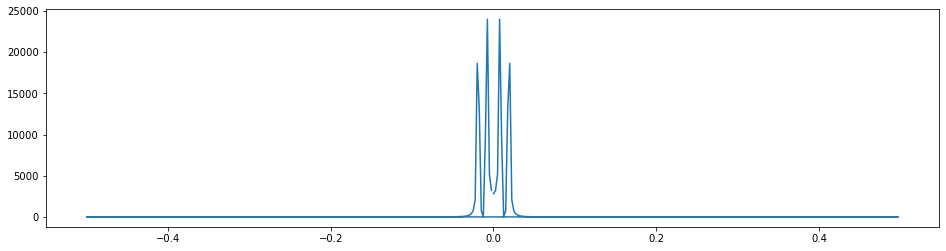

In [11]:
fig, axs = plt.subplots(1, figsize=plt.figaspect(0.25))
axs.plot(impure_freq, impure_sp)
plt.show()

For a more visual introduction to the fourier transform, watch this [video](https://www.youtube.com/embed/spUNpyF58BY?rel=0&amp;controls=0&amp;showinfo=0) by 3blue1brown.

### 2.2 - Why is this useful?
This tranform is very useful as it allows us to decompose time series. This allows for many different application and usages for this transform as a result when used in conjunction with the inverse transform. A few examples being:

* in sound editing, a high frequency within an audio file can be easily identified and altered after transforming the sound wave using the fourier transform, 

* in forsensics, a periodic background image behind a fingerprint could be easily removed after performing a fourier transform in order to create a more focused image,

* there is also another application of the fourier transform involving the usage of engine sounds(mentioned earlier) that we will go into much greater detail below.

## 3. Use case: time series classification

By transforming the audio files of engine sounds, it could be possible to diagnose whether the symptoms of engine problems exist within certain cars, by identifying the presence of certain frequencies that suggest said symptoms could be present. 

That was one of the problem used in the IEEE World Congress on Computational Intelligence competition in 2008, but before we discuss a specific use case, it is important to understand what a classification problem is and, specifically, what time series classification is? 

Until now, we've only considered a single univariate time series, whereas in many real world applications we observe multiple time series. Multiple time series can arise in two different ways: 

- **multivariate data** - An example of needing a multivariate time series, is when you are observing the effect of multiple variable on an observation, such as how a patient's diet, lifestyle and exercise could affect their physical health. 
- **multiple independent time series (panel data)** - An example of a usage of multiple time series could be if you're trying to train or optimise an algorithm by looking at multiple time series. For instance, by trying to detect the symptoms of faults in the engine by sampling engine noise.

Another important distinguishment between the multiple time series and multivariate time series is their statistical dependence(explained further below). Multiple time series are usually assumed to be inpendent, whilst multivariate time series are non-independent. This is because their is a bias attached to sampling observations from multiple variable over time, i.e when sampling the height, weight and age of children, it is generally expected for these variables to increase over time and have some affect on one another. This means that we cannot assume statitical inpendence for these multivariate time series. This problem does not arise wih multiple univariate time series however since the only variable present is time, so we cannot make predictions based off this variable alone without considering other factors and characteristics about the data.

### 3.1 - What is Classification

Variables can be described as either qualitative or quantitative, meaning they can be expressed numerically or categorically respectively. A person's height and age are simple examples of quantitative data, whilst somebody's sex or favourite colour would be qualitative data. 

It is important to distinguish between these two types of data as it changes how we approach the problems that involve these data. Regression problems are defined to have continuous target variables and classification problems are defined to have binary target variables. In our particular use case, we want to focus on classification as we are aiming to make predictions and classify new data.


### 3.2 - Problem statement: time series classification
Time Series Classification involves assigning class labels to certain time series' based on their behaviour over time. For example, trying to classify the time series of heart rates of athletes, from pre-workout to post-workout, into male and female athletes. Men usually tend to have lower resting heart rates but higher peak heart rates during exercise, this would result in a noticeable difference in the shape of the time series of men compare to women. A suitable algorithm such as k-Nearest Neighbours or the Random Forest(RF) classification algorithm could classify these time series.

While both Standard Classification(SC) and Time Series Classification(TSC) involve the classification of observations between at least 2 variables, TSC specifically involves changes over time. As a result, entire time series are required to represent single observations in TS. Compared to SC, where only single plots are needed to represent a single observation.

Specifically, this problem is a binary classification problem, involving multiple independent univariate time series. This means that each time series shows the change in a single variable over time; the aim is to group the time series into two distinct categories.

### 3.3 - Data set: FordA

The dataset consists of 500 measurements of engine noise in 4921 independent engines as well as a corresponding class label each time series. The train and test dataset for FordA was collected in typical operating conditions, with minimal noise contamination. To start, we are going to explore the data.

In [12]:
X, y = load_data() #Loads the data 

In [13]:
print(X.shape, y.shape) #X contains the time series, Y contains the class label

(4921, 500) (4921,)


In [14]:
unique_values, counts = np.unique(y, return_counts=True) #There are only 2 unique values, hence this is a binary classification.
print(unique_values, counts)

['-1' '1'] [2527 2394]


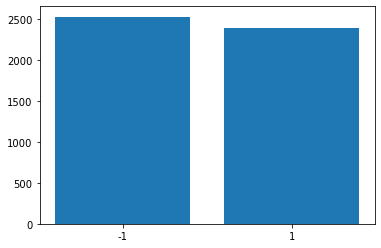

In [15]:
plt.bar(unique_values, counts);

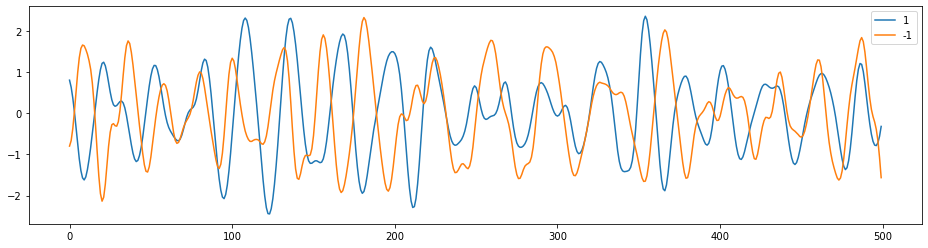

In [16]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
ax.plot(np.arange(X.shape[1]), X[np.where(y=="1")[0][0],:], label="1")
ax.plot(np.arange(X.shape[1]), X[np.where(y=="-1")[0][0],:], label="-1")
plt.legend();

### 3.4 - Methodology
In order to show the effectiveness of the Fourier Transform for classifying Time Series data, we are going to classify the FordAn dataset twice. Once with **only** the Random Forest Classification (RFC) Algorithm and once with **both** the RFC Algorithm and Fourier Transformed Training Data. The [RFC Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is stated to be "meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting".
We will use this to group the multiple time series.

Before this however, the time series data will then be split into training and testing data. The training data is used to train the algorithm by teaching it how certain classes behave over time whilst the testing data is new data, that is unseen by the algorithm, used by the alogorithm to make predictions. Once the data has been split, the training data is then fit to the classifier - this is where we train the algorithm to understand the characteristics that distinguish between the faulty and non-faulty engine groups. 

Once we have split the data, we **fit** the classifier to the training data and use the fitted model to generate predictions based on the test data. We can then calculate the accuracy of the model by comparing the predicted categories(faulty or non-faulty) to the **true** values.


An overview of the Methodology:

1. Split the data into training data and test data
2. Fit the classifier to the training data
3. Generate predictions of the test data using the fitted model
4. Compare the data against the actual values
5. Repeat Steps 2 - 4 with Fourier Transformed Training Data
6. Compare accuracy differences

Description of Variables:

* X_train = Time Series data used for Training
* y_train = X_train's corresponding class
* X_test = Time Series data used for testing
* y_test = X_test's true values
* y_pred = X_test's predicted values
* classifier_No_Ft = Fitted Model - No Fourier Transform
* X_train_ps = Fourier Transformed X_train
* X_test_ps = Fourier Transformed X_test
* classifier_FT = Fitted Model - with Fourier Transform
* y_pred_ps = X_train_ps's predicted values

#### Without Fourier Transform:

In [17]:
#Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
#Dimensions of the training and test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3690, 500) (1231, 500) (3690,) (1231,)


In [19]:
#Fit the Classifier to the training data
classifier_No_FT = RandomForestClassifier()
classifier_No_FT.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
#Predict the classes of the test data using the fitted model
y_pred = classifier_No_FT.predict(X_test)

#### With Fourier Transform:

In [21]:
#Apply Fourier Transform to the Training and Test Data
X_train_ps = powerspectrum(X_train)
X_test_ps = powerspectrum(X_test)

In [22]:
#Fit the Classifier to the training data
classifier_FT = RandomForestClassifier()
classifier_FT.fit(X_train_ps, y_train)

RandomForestClassifier()

In [23]:
#Predict the classes of the test data using the fitted model
y_pred_ps = classifier_FT.predict(X_test_ps)

### 3.5 - Results
In order to compare the quantify the performance of each method, we are going to use calculate the accuracy ([ACC](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers)) of each method and compare them. This is calculated by finding the proportion that the true postives and true negatives take over the total population. This can also be seen in this equation:

$$ACC = \frac{\sum(\text{True positive}) + \sum(\text{True negative})}{\sum(\text{Total population})}$$

True positives and true negatives are correct predictions for each class, i.e. correctly predicting the class of a faulty engine(True positive) and correctly predicting the class of a non-faulty engine(True Negative). False positive and false negatives are the remaining incorrect predictions, such as predicting a faulty engine to be non-faulty(False negative) or predicting a non-faulty engine as faulty(False positive). 

By this equation, its clear that a higher number of "true" prediction would result in a higher accuracy, however there is room for biases. For instance, if the data was not balanced - one class had a significantly higher representation than another - then the likelyhood of making an incorrect prediction is vastly reduced due to the massive skew in the data as blindly predicting the majority would yield a high accuracy. This shows more to the flaws in the dataset rather than the predictive power of the algorithm or methods used. Fortunately, this is absent in this data set (refer back to Section 3.3).

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
#### Accuracy without Fourier Transform

In [26]:
accuracy_score(y_test, y_pred)

0.7416734362307067

In [27]:
#### Accuracy with Fourier Transform

In [28]:
accuracy_score(y_test, y_pred_ps)

0.9163281884646629

From these accuracy scores, it is clear to see that the fourier transformed data set yield a higher accuracy of predicted classes when compare to the non-fourier transformed data set. This suggests that it is easier to detect the faults in the frequency domain in comparison to the time domain.

## 4. Future work
In the future, I want to integrate this code with existing functionality in other toolboxes, such as:

* scikit-learn and pipelining
* sktime


## 5. References

* Fourier transform visualised - https://www.youtube.com/embed/spUNpyF58BY?rel=0&amp;controls=0&amp;showinfo=0
* An intro to Fourier Transform - https://www.youtube.com/embed/1JnayXHhjlg
* Almost Everything You Need to Know About Time Series - https://towardsdatascience.com/almost-everything-you-need-to-know-about-time-series-860241bdc578
* A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python - https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
* A Gentle Introduction to SARIMA for Time Series Forecasting in Python - https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
* An introduction to Statistical Learning - http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
* Scikit learn - Random Forest Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Evaluation of Binary Classifiers - https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers